In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import random
from functions import *

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Physician trust network

In [111]:
G = nx.read_adjlist("mass_data/less_than_1500_nodes/physician_trust/edges.csv", delimiter=",")

### Computing $q^*$

In [112]:
N = len(G.nodes)

In [113]:
def degreesNodes(G):
    "Returns list of degrees and nodes"
    dictDegree=G.degree()
    degrees=[]
    nodes=[]

    for n in G.nodes():
        degrees.append(dictDegree[n])
        nodes.append(n)
    return np.array(degrees),np.array(nodes)

def nonVulnerable(ns,dg,q):
    "Returns nodes from list ns with degree ds that are not vulnerable at level q"
    sus=[]
    TorF = dg > 1/q
    for n in range(N):
        if TorF[n]:
            sus.append(ns[n])
    return(sus)

def netProperties(G):
    if G.number_of_nodes() == 0:
        return(0,0)
    largest_cc=max(nx.connected_components(G),key=len)
    Gcc=G.subgraph(largest_cc)
    Ncc=nx.number_of_nodes(Gcc)
    deg,nodes = degreesNodes(G)
    
    if (np.average(deg*deg) == 0): #if there is only one vulnerable node as the subgraph, it will have degree 0. => fluctuation zero. 
        #do this to avoid division by zero.
        return (0,len(Gcc))
    
    return(np.average(deg*deg)/np.average(deg), len(Gcc))

In [114]:
qs = np.linspace(0.02, 0.32)

GS_results = dict.fromkeys(qs)

for q in qs:

    DG, NS = degreesNodes(G)
    S = nonVulnerable(NS, DG, q)

    GS = G.copy()
    for n in S:
        nx.Graph.remove_node(GS, n)

    GS_results[q] = netProperties(GS)

Sn = [v[1] for v in GS_results.values()]

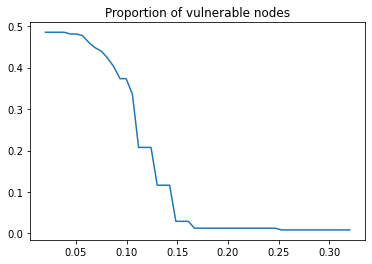

In [115]:
plt.title('Proportion of vulnerable nodes')
plt.plot(qs, np.array(Sn)/N)
plt.show()

$q^*$ is 0.15?

### Simulating $q^*$ for the 3 seeding methods

In [116]:
##TAKES DAMN LONG

qs = np.arange(0.2, 0.95, 0.05).round(2)
R_finalprop = []#final proportions
P_finalprop = []
F_finalprop = []

p = 0.1 #seeding proportion

for q in qs:
    print(q, end=", ")
    #random
    Rrhos = get_rhos(G, q = q, tmax = 20, rep = 10, seed_method = 'random', p = p)
    rand_props = Rrhos.mean(axis=0) 
    #rand_stds = Rrhos.std(axis = 0) 
    R_finalprop.append(rand_props[-1]) #how do the final proportions chenge with q?
    
    #pair
    Prhos = get_rhos(G, q = q, tmax = 20, rep = 10, seed_method = 'pair', p = p)
    pair_props = Prhos.mean(axis=0) 
    #pair_stds = Prhos.std(axis = 0) 
    P_finalprop.append(pair_props[-1])
    
    #friend
    Frhos = get_rhos(G, q = q, tmax = 20, rep = 10, seed_method = 'friend', p = p)
    friend_props = Frhos.mean(axis=0) #take the mean over each col (time)
    #friend_stds = Frhos.std(axis = 0) #for errorbars
    F_finalprop.append(friend_props[-1])

0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 

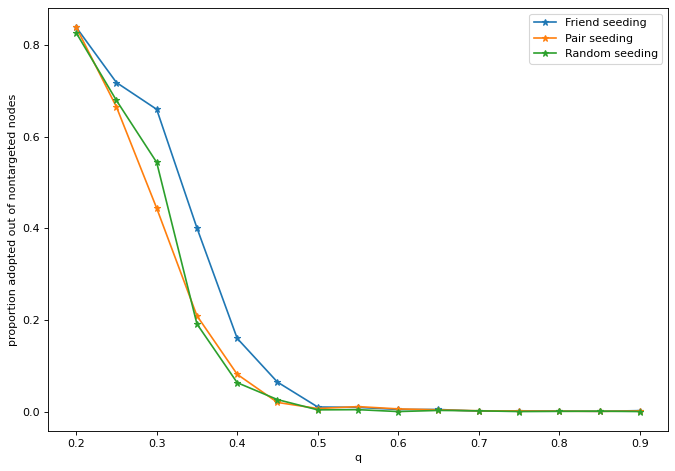

In [117]:
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(qs, np.array(F_finalprop) - p,
         "-*",label=r"Friend seeding")
#plt.errorbar(np.arange(0, len(friend_props)), friend_props, yerr = friend_stds, fmt = "-*", label=r"Friend seeding")

plt.plot(qs, np.array(P_finalprop) - p,
         "-*",label=r"Pair seeding")
plt.plot(qs, np.array(R_finalprop) - p,
         "-*",label=r"Random seeding")
#plt.errorbar(np.arange(0, len(pair_props)), pair_props, yerr = pair_stds, fmt = "-*", label=r"Pair seeding")
#plt.errorbar(np.arange(0, len(rand_props)), rand_props, yerr = rand_stds, fmt = "-*", label=r"Random seeding")

plt.xlabel("q")
plt.ylabel("proportion adopted out of nontargeted nodes")
plt.legend()
plt.show()

$q^*$ is 0.5 for all 3 seeding methods?

## 2. Barabasi-Albert network

In [104]:
G = nx.read_adjlist("mass_data/less_than_1500_nodes/physician_trust/edges.csv", delimiter=",")
N = len(G.nodes)
L = len(G.edges)
m = L/N
G = nx.barabasi_albert_graph(N,round(m))

### Computing $q^*$

In [105]:
N = len(G.nodes)

In [106]:
def degreesNodes(G):
    "Returns list of degrees and nodes"
    dictDegree=G.degree()
    degrees=[]
    nodes=[]

    for n in G.nodes():
        degrees.append(dictDegree[n])
        nodes.append(n)
    return np.array(degrees),np.array(nodes)

def nonVulnerable(ns,dg,q):
    "Returns nodes from list ns with degree ds that are not vulnerable at level q"
    sus=[]
    TorF = dg > 1/q
    for n in range(N):
        if TorF[n]:
            sus.append(ns[n])
    return(sus)

def netProperties(G):
    if G.number_of_nodes() == 0:
        return(0,0)
    largest_cc=max(nx.connected_components(G),key=len)
    Gcc=G.subgraph(largest_cc)
    Ncc=nx.number_of_nodes(Gcc)
    deg,nodes = degreesNodes(G)
    
    if (np.average(deg*deg) == 0): #if there is only one vulnerable node as the subgraph, it will have degree 0. => fluctuation zero. 
        #do this to avoid division by zero.
        return (0,len(Gcc))
    
    return(np.average(deg*deg)/np.average(deg), len(Gcc))

In [107]:
qs = np.linspace(0.02, 0.32)

GS_results = dict.fromkeys(qs)

for q in qs:

    DG, NS = degreesNodes(G)
    S = nonVulnerable(NS, DG, q)

    GS = G.copy()
    for n in S:
        nx.Graph.remove_node(GS, n)

    GS_results[q] = netProperties(GS)

Sn = [v[1] for v in GS_results.values()]

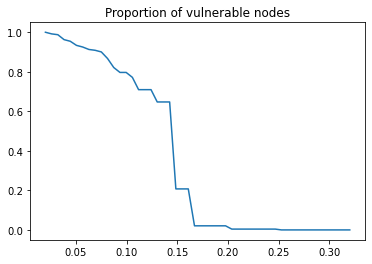

In [108]:
plt.title('Proportion of vulnerable nodes')
plt.plot(qs, np.array(Sn)/N)
plt.show()

$q^*$ is 0.15?

### Simulating $q^*$ for the 3 seeding methods

In [109]:
##TAKES DAMN LONG

qs = np.arange(0.2, 0.95, 0.05).round(2)
R_finalprop = []#final proportions
P_finalprop = []
F_finalprop = []

p = 0.1 #seeding proportion

for q in qs:
    print(q, end=", ")
    #random
    Rrhos = get_rhos(G, q = q, tmax = 20, rep = 10, seed_method = 'random', p = p)
    rand_props = Rrhos.mean(axis=0) 
    #rand_stds = Rrhos.std(axis = 0) 
    R_finalprop.append(rand_props[-1]) #how do the final proportions chenge with q?
    
    #pair
    Prhos = get_rhos(G, q = q, tmax = 20, rep = 10, seed_method = 'pair', p = p)
    pair_props = Prhos.mean(axis=0) 
    #pair_stds = Prhos.std(axis = 0) 
    P_finalprop.append(pair_props[-1])
    
    #friend
    Frhos = get_rhos(G, q = q, tmax = 20, rep = 10, seed_method = 'friend', p = p)
    friend_props = Frhos.mean(axis=0) #take the mean over each col (time)
    #friend_stds = Frhos.std(axis = 0) #for errorbars
    F_finalprop.append(friend_props[-1])

0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 

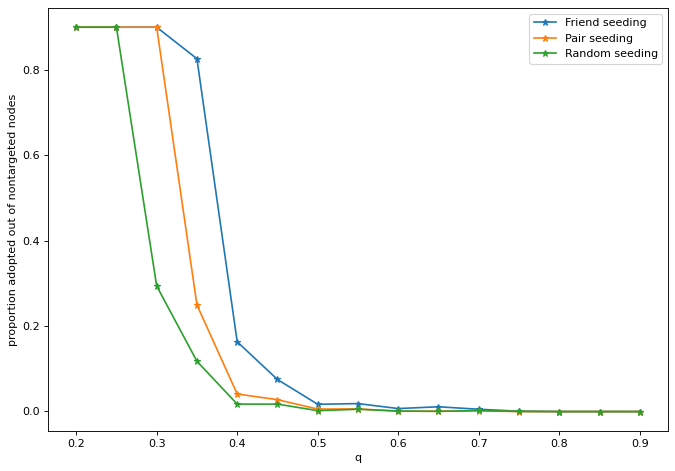

In [110]:
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(qs, np.array(F_finalprop) - p,
         "-*",label=r"Friend seeding")
#plt.errorbar(np.arange(0, len(friend_props)), friend_props, yerr = friend_stds, fmt = "-*", label=r"Friend seeding")

plt.plot(qs, np.array(P_finalprop) - p,
         "-*",label=r"Pair seeding")
plt.plot(qs, np.array(R_finalprop) - p,
         "-*",label=r"Random seeding")
#plt.errorbar(np.arange(0, len(pair_props)), pair_props, yerr = pair_stds, fmt = "-*", label=r"Pair seeding")
#plt.errorbar(np.arange(0, len(rand_props)), rand_props, yerr = rand_stds, fmt = "-*", label=r"Random seeding")

plt.xlabel("q")
plt.ylabel("proportion adopted out of nontargeted nodes")
plt.legend()
plt.show()

$q^*$ is 0.5 for all 3 seeding methods? Perhaps 0.4 for Pair and Random?

### Testing space

In [142]:
G = nx.read_adjlist("mass_data/less_than_1500_nodes/7th_graders/edges.csv", delimiter=",")

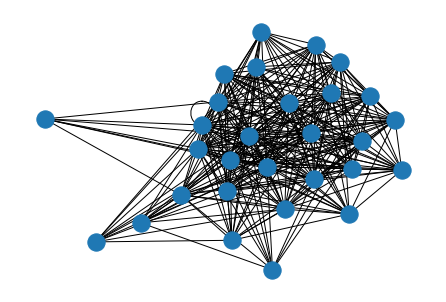

In [143]:
nx.draw(G)

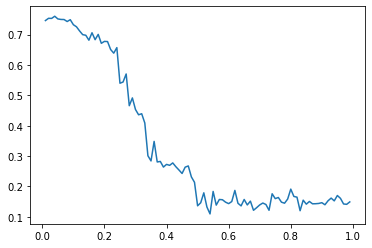

In [62]:
plt.plot(qs, empirical_networks['kidnappings']['pair']['props'])
plt.show()

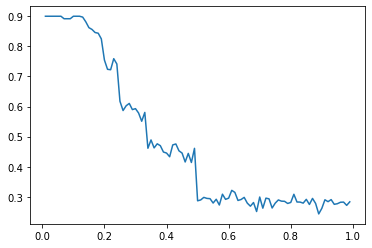

In [63]:
plt.plot(qs, BA_networks['kidnappings']['friend']['props'])
plt.show()

## Automation

In [170]:
from os import listdir

In [2]:
import glob

In [20]:
empirical_networks

{'7th_graders': {'random': {'props': array([ 0.9       ,  0.9       ,  0.9       ,  0.9       ,  0.9       ,
           0.9       ,  0.9       ,  0.9       ,  0.9       ,  0.9       ,
           0.9       ,  0.9       ,  0.7137931 ,  0.62068966,  0.06206897,
          -0.02758621,  0.15517241,  0.24827586, -0.03103448, -0.03103448,
           0.15517241,  0.15517241, -0.02413793,  0.06896552, -0.02413793,
          -0.03103448,  0.06206897,  0.06206897, -0.03103448, -0.03103448,
          -0.03103448, -0.03103448, -0.03103448, -0.03103448, -0.03103448,
          -0.03103448, -0.03103448, -0.03103448, -0.03103448, -0.03103448,
          -0.03103448, -0.03103448, -0.03103448, -0.03103448, -0.03103448,
          -0.03103448, -0.03103448, -0.03103448, -0.03103448, -0.03103448,
          -0.03103448, -0.03103448, -0.03103448, -0.03103448, -0.03103448,
          -0.03103448, -0.03103448, -0.03103448, -0.03103448, -0.03103448,
          -0.03103448, -0.03103448, -0.03103448, -0.03103448, -0.0

In [21]:
plt.plot(data[(data["version"] == "empirical") & (data["seeding_method"] == "friend")]["N"],
         data[(data["version"] == "empirical") & (data["seeding_method"] == "friend")]["critical_q"],
         label="friend")

plt.plot(data[(data["version"] == "empirical") & (data["seeding_method"] == "pair")]["N"],
         data[(data["version"] == "empirical") & (data["seeding_method"] == "pair")]["critical_q"],
         label="pair")

plt.plot(data[(data["version"] == "empirical") & (data["seeding_method"] == "random")]["N"],
         data[(data["version"] == "empirical") & (data["seeding_method"] == "random")]["critical_q"],
         label="random")

plt.xlabel("N")
plt.ylabel("critical q")
plt.title("Empirical")
plt.legend()
plt.show()

NameError: name 'data' is not defined

In [8]:
#empirical_networks = {}
#BA_networks = {}

path = "mass_data/less_than_1500_nodes"
data_paths = [x.replace("{}\\".format(path), "") for x in glob.glob("{}/*".format(path))]

for name in data_paths:
    if name == "bt.csv":
        continue
             
    if name in empirical_networks:
        continue
        
    print("\n" + name, end=": ")
    empirical_networks[name] = {"random": {}, "pair": {}, "friend": {}}
    BA_networks[name] = {"random": {}, "pair": {}, "friend": {}}
    
    if any(fname.endswith('.csv') for fname in  glob.glob('{}/{}/*'.format(path,name))):
        df = pd.read_csv('{}/{}/edges.csv'.format(path,name))
        G = nx.from_pandas_edgelist(df, "# source", " target")
    elif any(fname.endswith('.edgelist') for fname in glob.glob('{}/{}/*'.format(path,name))):
        G = nx.read_edgelist("{}/{}/edges.edgelist".format(path, name), nodetype=int)
    elif not any(fname.endswith('txt.gz') for fname in  glob.glob('{}/{}/*'.format(path,name))):
        G = nx.read_adjlist("{}/{}/edges.txt".format(path, name), nodetype=int)
    else:
        G = nx.read_adjlist(gzip.open('{}/{}/edges.txt.gz'.format(path,name)), nodetype=int)
    
    N = len(G.nodes)
    L = len(G.edges)
    m = L/N
    Gba = nx.barabasi_albert_graph(N, round(m))
    
    qs = np.arange(0.01, 1, 0.01).round(2)
    p = 0.1  # seeding proportion

    #---EMPIRICAL---#
    R_finalprop = []
    P_finalprop = []
    F_finalprop = []
    for q in qs:
        print(q, end=", ")
        
        # Random
        Rrhos = get_rhos(G, q = q, tmax = 20, rep = 10, seed_method = 'random', p = p)
        rand_props = Rrhos.mean(axis=0) 
        R_finalprop.append(rand_props[-1])

        # Pair
        Prhos = get_rhos(G, q = q, tmax = 20, rep = 10, seed_method = 'pair', p = p)
        pair_props = Prhos.mean(axis=0) 
        P_finalprop.append(pair_props[-1])

        # Friend
        Frhos = get_rhos(G, q = q, tmax = 20, rep = 10, seed_method = 'friend', p = p)
        friend_props = Frhos.mean(axis=0)
        F_finalprop.append(friend_props[-1])
                        
    empirical_networks[name]["random"]["props"] = np.array(R_finalprop) - p
    empirical_networks[name]["pair"]["props"]   = np.array(P_finalprop) - p
    empirical_networks[name]["friend"]["props"] = np.array(F_finalprop) - p

    for i in range(len(qs)):
        if (np.array(R_finalprop) - p)[i] < 0.05:
            empirical_networks[name]["random"]["crit_q"] = qs[i]
            break

    for i in range(len(qs)):
        if (np.array(P_finalprop) - p)[i] < 0.05:
            empirical_networks[name]["pair"]["crit_q"] = qs[i]
            break

    for i in range(len(qs)):
        if (np.array(F_finalprop) - p)[i] < 0.05:
            empirical_networks[name]["friend"]["crit_q"] = qs[i]
            break
            
    #---BARABASI-ALBERT---#
    R_finalprop = []
    P_finalprop = []
    F_finalprop = []
    for q in qs:
        print(q, end=", ")
    
        # Random
        Rrhos = get_rhos(Gba, q = q, tmax = 20, rep = 10, seed_method = 'random', p = p)
        rand_props = Rrhos.mean(axis=0) 
        R_finalprop.append(rand_props[-1])

        # Pair
        Prhos = get_rhos(Gba, q = q, tmax = 20, rep = 10, seed_method = 'pair', p = p)
        pair_props = Prhos.mean(axis=0) 
        P_finalprop.append(pair_props[-1])

        # Friend
        Frhos = get_rhos(Gba, q = q, tmax = 20, rep = 10, seed_method = 'friend', p = p)
        friend_props = Frhos.mean(axis=0)
        F_finalprop.append(friend_props[-1])
            
    BA_networks[name]["random"]["props"] = np.array(R_finalprop) - p
    BA_networks[name]["pair"]["props"]   = np.array(P_finalprop) - p
    BA_networks[name]["friend"]["props"] = np.array(F_finalprop) - p

    for i in range(len(qs)):
        if (np.array(R_finalprop) - p)[i] < 0.05:
            BA_networks[name]["random"]["crit_q"] = qs[i]
            break

    for i in range(len(qs)):
        if (np.array(P_finalprop) - p)[i] < 0.05:
            BA_networks[name]["pair"]["crit_q"] = qs[i]
            break

    for i in range(len(qs)):
        if (np.array(F_finalprop) - p)[i] < 0.05:
            BA_networks[name]["friend"]["crit_q"] = qs[i]
            break


kor.2015.mers.1.00: 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67

swingers: 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6

KeyboardInterrupt: 

In [27]:
for name in data_paths:
    if name == "bt.csv":
        continue
             
    if name not in empirical_networks:
        continue
    
    if any(fname.endswith('.csv') for fname in  glob.glob('{}/{}/*'.format(path,name))):
        df = pd.read_csv('{}/{}/edges.csv'.format(path,name))
        G = nx.from_pandas_edgelist(df, "# source", " target")
    elif any(fname.endswith('.edgelist') for fname in glob.glob('{}/{}/*'.format(path,name))):
        G = nx.read_edgelist("{}/{}/edges.edgelist".format(path, name), nodetype=int)
    elif not any(fname.endswith('txt.gz') for fname in  glob.glob('{}/{}/*'.format(path,name))):
        G = nx.read_adjlist("{}/{}/edges.txt".format(path, name), nodetype=int)
    else:
        G = nx.read_adjlist(gzip.open('{}/{}/edges.txt.gz'.format(path,name)), nodetype=int)
    
    N = len(G.nodes)
    empirical_networks[name]["N"] = len(G.nodes)
    BA_networks[name]["N"] = len(G.nodes)

In [30]:
for network in empirical_networks:
    for seeding_method in ["random", "pair", "friend"]:
            
        props = empirical_networks[network][seeding_method]["props"]
        for i in range(len(qs)):
            if props[i] < 0.05:
                empirical_networks[network][seeding_method]["crit_q"] = qs[i]
                break
        else:
            empirical_networks[network][seeding_method]["crit_q"] = 1
#             props = empirical_networks[network][seeding_method]["props"]
#             minimum = np.min(props)
#             for i in range(len(qs)):
#                 if props[i] < minimum + 0.02:
#                     empirical_networks[network][seeding_method]["crit_q"] = qs[i]
#                     break

for network in BA_networks:
    for seeding_method in ["random", "pair", "friend"]:
            
        props = BA_networks[network][seeding_method]["props"]
        for i in range(len(qs)):
            if props[i] < 0.05:
                BA_networks[network][seeding_method]["crit_q"] = qs[i]
                break
        else:
            BA_networks[network][seeding_method]["crit_q"] = qs[i]
#             props = BA_networks[network][seeding_method]["props"]
#             minimum = np.min(props)
#             for i in range(len(qs)):
#                 if props[i] < minimum + 0.02:
#                     BA_networks[network][seeding_method]["crit_q"] = qs[i]
#                     break

In [31]:
data = pd.DataFrame(columns=["version", "network", "N", "seeding_method", "critical_q"])

In [32]:
for network in empirical_networks:
    for seeding_method in ["random", "pair", "friend"]:
        data = pd.concat([data, pd.DataFrame({"version": "empirical",
                                              "network": [network],
                                              "N": [empirical_networks[network]["N"]],
                                              "seeding_method": [seeding_method],
                                              "critical_q": [empirical_networks[network][seeding_method]["crit_q"]]})],
                        ignore_index=True)
        
for network in BA_networks:
    for seeding_method in ["random", "pair", "friend"]:
        data = pd.concat([data, pd.DataFrame({"version": "BA",
                                              "network": [network],
                                              "N": [BA_networks[network]["N"]],
                                              "seeding_method": [seeding_method],
                                              "critical_q": [BA_networks[network][seeding_method]["crit_q"]]})],
                        ignore_index=True)

In [39]:
data = data.sort_values(by=["N"], ignore_index=True)
data = data[data["N"] < 5000]

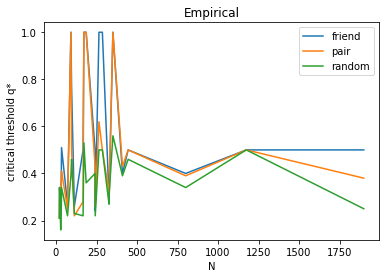

In [54]:
plt.plot(data[(data["version"] == "empirical") & (data["seeding_method"] == "friend")]["N"],
         data[(data["version"] == "empirical") & (data["seeding_method"] == "friend")]["critical_q"],
         label="friend")

plt.plot(data[(data["version"] == "empirical") & (data["seeding_method"] == "pair")]["N"],
         data[(data["version"] == "empirical") & (data["seeding_method"] == "pair")]["critical_q"],
         label="pair")

plt.plot(data[(data["version"] == "empirical") & (data["seeding_method"] == "random")]["N"],
         data[(data["version"] == "empirical") & (data["seeding_method"] == "random")]["critical_q"],
         label="random")

plt.xlabel("N")
plt.ylabel("critical threshold q*")
plt.title("Empirical")
plt.legend()
plt.show()

In [51]:
for network in empirical_networks:
    print(network, empirical_networks[network]["friend"]["crit_q"])

7th_graders 0.22
aves-weaver-social 0.5
contacts-prox-high-school-2013 0.27
contacts-prox-high-school-2013-attr 0.3
email_company 0.5
fb-messages 0.5
fb-pages-politician 1
fb_friends.csv 0.4
high_tech_company 0.21
inf-euroroad 0.5
infect-dublin 0.4
infect-hyper 0.26
Karate 0.51
kidnappings 1
kor.2015.mers.1.00 1
law_firm 0.27
moreno_taro 0.34
physician_trust 0.5
sgp.2003.sars.1.00 1
soc-firm-hi-tech 0.42
swingers 0.77
usa.2009.flu.1.00 1
usa.2020.covid.6.00 1
webkb-wisc 1
zprimary-school-proximity 0.24


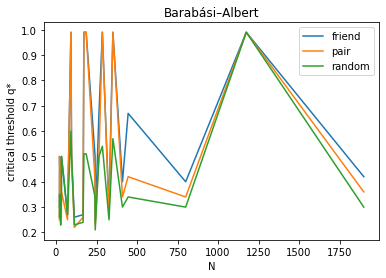

In [55]:
plt.plot(data[(data["version"] == "BA") & (data["seeding_method"] == "friend")]["N"],
         data[(data["version"] == "BA") & (data["seeding_method"] == "friend")]["critical_q"],
         label="friend")

plt.plot(data[(data["version"] == "BA") & (data["seeding_method"] == "pair")]["N"],
         data[(data["version"] == "BA") & (data["seeding_method"] == "pair")]["critical_q"],
         label="pair")

plt.plot(data[(data["version"] == "BA") & (data["seeding_method"] == "random")]["N"],
         data[(data["version"] == "BA") & (data["seeding_method"] == "random")]["critical_q"],
         label="random")

plt.xlabel("N")
plt.ylabel("critical threshold q*")
plt.title("Barabási–Albert")
plt.legend()
plt.show()

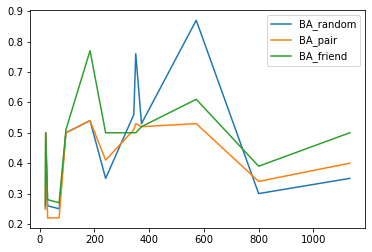

In [284]:
plt.plot(data[(data["version"] == "BA") & (data["seeding_method"] == "random")]["N"],
         data[(data["version"] == "BA") & (data["seeding_method"] == "random")]["critical_q"],
         label="BA_random")

plt.plot(data[(data["version"] == "BA") & (data["seeding_method"] == "pair")]["N"],
         data[(data["version"] == "BA") & (data["seeding_method"] == "pair")]["critical_q"],
         label="BA_pair")

plt.plot(data[(data["version"] == "BA") & (data["seeding_method"] == "friend")]["N"],
         data[(data["version"] == "BA") & (data["seeding_method"] == "friend")]["critical_q"],
         label="BA_friend")

plt.legend()
plt.show()

In [56]:
data[data["version"] == "empirical"]

,version,network,N,seeding_method,critical_q
0,empirical,high_tech_company,21,friend,0.21
1,empirical,high_tech_company,21,pair,0.21
2,empirical,high_tech_company,21,random,0.21
7,empirical,moreno_taro,22,random,0.34
9,empirical,moreno_taro,22,friend,0.34
...,...,...,...,...,...
136,empirical,inf-euroroad,1174,friend,0.50
137,empirical,inf-euroroad,1174,pair,0.50
138,empirical,fb-messages,1899,friend,0.50
139,empirical,fb-messages,1899,random,0.25


In [61]:
data[data["N"] == 1174]

,version,network,N,seeding_method,critical_q
132,empirical,inf-euroroad,1174,random,0.50
133,BA,inf-euroroad,1174,pair,0.99
134,BA,inf-euroroad,1174,random,0.99
135,BA,inf-euroroad,1174,friend,0.99
136,empirical,inf-euroroad,1174,friend,0.50
137,empirical,inf-euroroad,1174,pair,0.50


In [58]:
data.to_csv("qstar_vs_N.csv")

In [291]:
import pickle

In [292]:
with open('empirical_networks.pkl', 'wb') as f:
    pickle.dump(empirical_networks, f)
    
with open('BA_networks.pkl', 'wb') as f:
    pickle.dump(BA_networks, f)